In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('data/CollegePlacement.csv')
df.head(3)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No


In [3]:
df.shape

(10000, 10)

In [4]:
df.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
College_ID,10000,100,CLG0062,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IQ,10000.0,NaN,NaN,NaN,99.4718,15.053101,41.0,89.0,99.0,110.0,158.0
Prev_Sem_Result,10000.0,NaN,NaN,NaN,7.535673,1.447519,5.0,6.29,7.56,8.79,10.0
CGPA,10000.0,NaN,NaN,NaN,7.532379,1.470141,4.54,6.29,7.55,8.77,10.46
Academic_Performance,10000.0,NaN,NaN,NaN,5.5464,2.873477,1.0,3.0,6.0,8.0,10.0
Internship_Experience,10000,2,No,6036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extra_Curricular_Score,10000.0,NaN,NaN,NaN,4.9709,3.160103,0.0,2.0,5.0,8.0,10.0
Communication_Skills,10000.0,NaN,NaN,NaN,5.5618,2.900866,1.0,3.0,6.0,8.0,10.0
Projects_Completed,10000.0,NaN,NaN,NaN,2.5134,1.715959,0.0,1.0,3.0,4.0,5.0
Placement,10000,2,No,8341,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns
num_cols

Index(['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed'],
      dtype='object')

In [8]:
cat_cols

Index(['College_ID', 'Internship_Experience', 'Placement'], dtype='object')

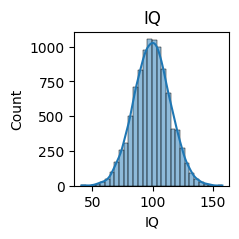

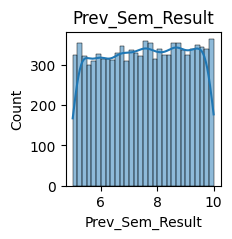

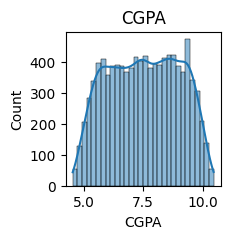

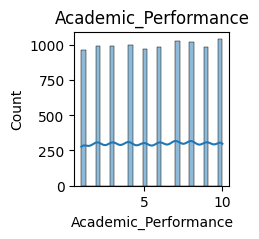

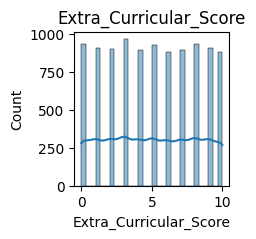

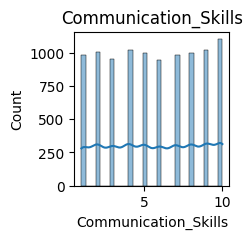

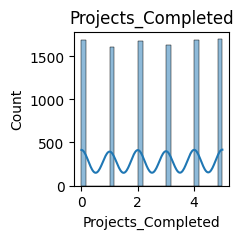

In [9]:
for i in num_cols:
    plt.figure(figsize=(2,2))
    sns.histplot(df[i], kde=True, bins=30)
    plt.title(f"{i}")
    plt.show()

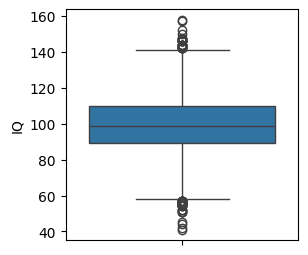

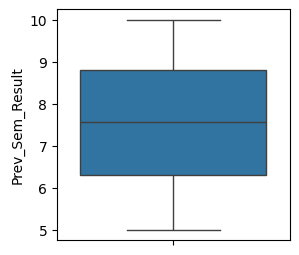

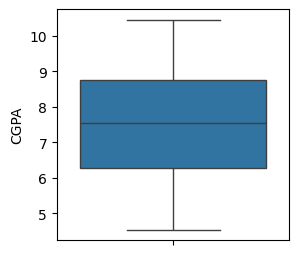

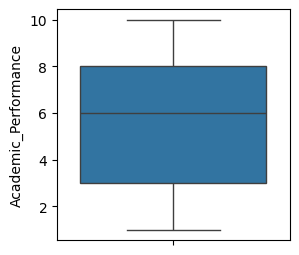

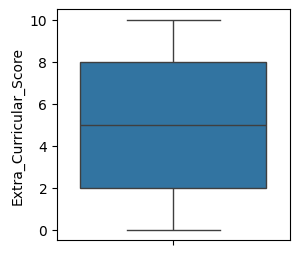

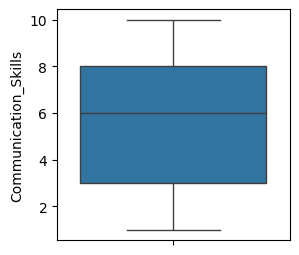

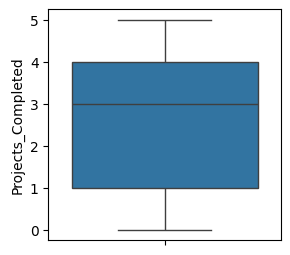

In [10]:
for i in num_cols:
    plt.figure(figsize=(3,3))
    sns.boxplot(df[i])
    plt.show()

In [11]:
data = df.drop(cat_cols, axis=1)
corr_matrix = data.corr()

In [12]:
np.fill_diagonal(corr_matrix.values,0)
corr_matrix

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
IQ,0.000000,-0.002640,-0.002859,-0.006827,-0.003458,-0.010896,0.014538
Prev_Sem_Result,-0.002640,0.000000,0.980768,-0.005765,0.009326,-0.017269,0.018434
CGPA,-0.002859,0.980768,0.000000,-0.002958,0.011441,-0.018242,0.020872
Academic_Performance,-0.006827,-0.005765,-0.002958,0.000000,0.011774,-0.019733,-0.013148
Extra_Curricular_Score,-0.003458,0.009326,0.011441,0.011774,0.000000,0.003769,0.008122
Communication_Skills,-0.010896,-0.017269,-0.018242,-0.019733,0.003769,0.000000,-0.004486
Projects_Completed,0.014538,0.018434,0.020872,-0.013148,0.008122,-0.004486,0.000000


In [13]:
abs_matrix = corr_matrix.abs()

max_corr = abs_matrix.stack().idxmax()
corr_value = corr_matrix.loc[max_corr[0],max_corr[1]]

print(f'Maximum correlated pair: {max_corr}')
print(f'Correlation Value: {corr_value}')

Maximum correlated pair: ('Prev_Sem_Result', 'CGPA')
Correlation Value: 0.9807680541535467


In [14]:
sort_corr = abs_matrix.stack().sort_values(ascending=False)
sort_corr.drop_duplicates(inplace=True)

In [15]:
for (col1, col2), corr_val in sort_corr.head(5).items():
    print(f'Maximum Correlation: {(col1, col2)}')
    print(f'Correlation Value: {corr_val}')

Maximum Correlation: ('CGPA', 'Prev_Sem_Result')
Correlation Value: 0.9807680541535467
Maximum Correlation: ('CGPA', 'Projects_Completed')
Correlation Value: 0.020872420853110477
Maximum Correlation: ('Communication_Skills', 'Academic_Performance')
Correlation Value: 0.01973277416551061
Maximum Correlation: ('Prev_Sem_Result', 'Projects_Completed')
Correlation Value: 0.018433663872536882
Maximum Correlation: ('Communication_Skills', 'CGPA')
Correlation Value: 0.01824199507951977


In [16]:
df = df.rename(columns= lambda x : x.lower())
df.head(1)

,college_id,iq,prev_sem_result,cgpa,academic_performance,internship_experience,extra_curricular_score,communication_skills,projects_completed,placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No


In [17]:
df.drop('college_id',axis=1,inplace=True)

In [18]:
df.to_csv("data/data.csv",index=False)

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
scaler = StandardScaler()

num_cols = df.select_dtypes(include='number').columns
for i in num_cols:
    df[i] = scaler.fit_transform(df[[i]])

In [21]:
enc = LabelEncoder()

cat_cols = df.select_dtypes(exclude='number').columns
for i in cat_cols:
    df[i] = enc.fit_transform(df[i])

In [22]:
cat_cols

Index(['internship_experience', 'placement'], dtype='object')

In [23]:
num_cols

Index(['iq', 'prev_sem_result', 'cgpa', 'academic_performance',
       'extra_curricular_score', 'communication_skills', 'projects_completed'],
      dtype='object')

In [24]:
df.head()

,iq,prev_sem_result,cgpa,academic_performance,internship_experience,extra_curricular_score,communication_skills,projects_completed,placement
0,0.500135,-0.639521,-0.851919,0.853921,0,0.958593,0.840550,0.866381,0
1,-0.164214,-1.392572,-1.470939,0.853921,0,0.642131,0.840550,-1.464794,0
2,0.633004,-1.503111,-1.158028,1.201949,0,-0.623713,-1.572644,-0.882000,0
3,1.496657,-1.427115,-1.212447,0.157865,1,-1.256636,0.151066,-0.882000,0
4,-0.230648,0.258612,0.107220,0.505893,0,0.958593,1.530034,-0.299206,0
